In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
from datetime import datetime
from datetime import date
from scipy.stats import linregress
import matplotlib.ticker as ticker


In [2]:
#define and read data files
flu_file = "input_data/flu_data.csv"
flight_file = "input_data/Flights_3_12_2020.csv"
coordinates_file = "input_data/Flights_3_12_2020.csv"

flu_data = pd.read_csv(flu_file, encoding = 'ISO-8859-1')
flight_data_df = pd.read_csv(flight_file)

flu_data['SDATE'] = pd.to_datetime(flu_data["SDATE"])
flu_data['EDATE'] = pd.to_datetime(flu_data["EDATE"])


#shorten time-frame
trimmed_flu_data = flu_data.loc[(flu_data["EDATE"] >= "2009-04-01") & (flu_data["EDATE"] < "2010-04-01") ]
trimmed_flu_data.head()





,Country,WHOREGION,FLUREGION,Year,Month,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,TITLE,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
13,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,3,14,2009-03-30,2009-04-05,NaN,NaN,...,No Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,15,2009-04-06,2009-04-12,NaN,NaN,...,No Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,16,2009-04-13,2009-04-19,NaN,NaN,...,No Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,17,2009-04-20,2009-04-26,NaN,NaN,...,No Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,18,2009-04-27,2009-05-03,NaN,NaN,...,No Report,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
flight_data_df.dtypes

Year              int64
Month            object
DOMESTIC         object
INTERNATIONAL    object
TOTAL            object
dtype: object

In [4]:
# drop null rows

trimmed_flu_data = trimmed_flu_data.fillna(0)

trimmed_flu_data

,Country,WHOREGION,FLUREGION,Year,Month,Week,SDATE,EDATE,SPEC_RECEIVED_NB,SPEC_PROCESSED_NB,...,TITLE,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
13,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,3,14,2009-03-30,2009-04-05,0.0,0.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,15,2009-04-06,2009-04-12,0.0,0.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,16,2009-04-13,2009-04-19,0.0,0.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,17,2009-04-20,2009-04-26,0.0,0.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,Anguilla,Region of the Americas of WHO,Central America and Caribbean,2009,4,18,2009-04-27,2009-05-03,0.0,0.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17910,Viet Nam,Western Pacific Region of WHO,South-East Asia,2010,2,8,2010-02-22,2010-02-28,0.0,101.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17911,Viet Nam,Western Pacific Region of WHO,South-East Asia,2010,3,9,2010-03-01,2010-03-07,0.0,108.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17912,Viet Nam,Western Pacific Region of WHO,South-East Asia,2010,3,10,2010-03-08,2010-03-14,0.0,101.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17913,Viet Nam,Western Pacific Region of WHO,South-East Asia,2010,3,11,2010-03-15,2010-03-21,0.0,111.0,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


C:\Users\lolgu\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
C:\Users\lolgu\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


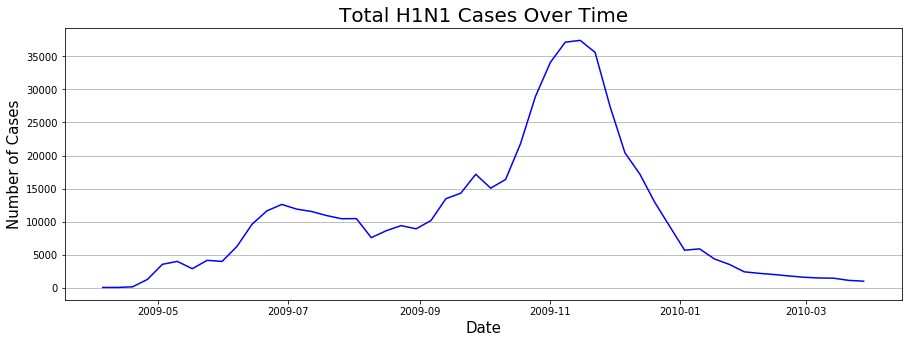

In [5]:
who_total = trimmed_flu_data.groupby(["EDATE"])

who_vol = who_total["AH1N12009"].sum()

who_vol.sort_index(inplace = True)

plt.figure(figsize = (15,5))
main_plot = plt.plot( who_vol, color = "blue", label = "Cases")
#tick_locations = [date for date in dates]
#plt.xticks(tick_locations, rotation = "90")
plt.tick_params(axis = 'both', labelsize = 10)

ax = plt.axes()

#ax.xaxis.set_major_locator(ticker.MultipleLocator(5))

plt.title("Total H1N1 Cases Over Time", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.grid(axis = 'y')
plt.show()


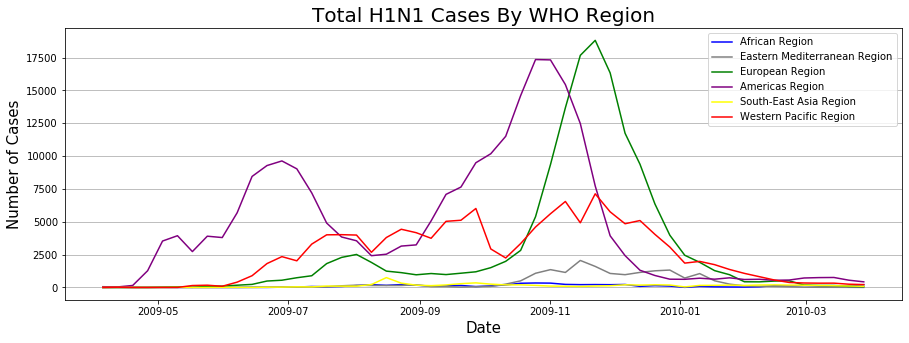

In [6]:
#create filtered dataframes
african = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'African Region of WHO']
eastern = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'Eastern Mediterranean Region of WHO']
european = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'European Region of WHO']
americas = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'Region of the Americas of WHO']
southeast = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'South-East Asia Region of WHO']
western_pacific = trimmed_flu_data.loc[trimmed_flu_data["WHOREGION"] == 'Western Pacific Region of WHO']

#group by EDATE
african_grouped = african.groupby(['EDATE'])
eastern_grouped = eastern.groupby(['EDATE'])
european_grouped = european.groupby(['EDATE'])
americas_grouped = americas.groupby(['EDATE'])
southeast_grouped = southeast.groupby(['EDATE'])
western_pacific_grouped = western_pacific.groupby(['EDATE'])

#grab summed cases
african_vol = african_grouped["AH1N12009"].sum()
eastern_vol = eastern_grouped["AH1N12009"].sum()
european_vol = european_grouped["AH1N12009"].sum()
americas_vol = americas_grouped["AH1N12009"].sum()
southeast_vol = southeast_grouped["AH1N12009"].sum()
western_pacific_vol = western_pacific_grouped["AH1N12009"].sum()

plt.figure(figsize = (15,5))
african_plot = plt.plot(african_vol, color="blue", label = "African Region")
eastern_plot, = plt.plot(eastern_vol , color="gray", label = "Eastern Mediterranean Region")
european_plot, = plt.plot(european_vol , color="green", label = "European Region")
americas_plot, = plt.plot(americas_vol , color="purple", label = "Americas Region")
southeast_plot, = plt.plot(southeast_vol , color="yellow", label = "South-East Asia Region")
western_pacific_plot, = plt.plot(western_pacific_vol , color="red", label = "Western Pacific Region")

plt.title("Total H1N1 Cases By WHO Region", fontsize = 20)
plt.ylabel("Number of Cases", fontsize = 15)
plt.xlabel("Date", fontsize = 15)
plt.legend(loc = "best")
plt.grid(axis = 'y')
plt.show()



# Flight Data Portion

In [7]:
# Drop the last few rows which have null values
flight_data_df = flight_data_df.dropna(how='any')

#remove TOTAL function from df
flight_data_df = flight_data_df[flight_data_df['Month'] != 'TOTAL']

flight_data_df['Year'] = flight_data_df['Year'].astype(str)

flight_data_df.dtypes

columns = flight_data_df.columns

for column in columns:
    flight_data_df[column] = flight_data_df[column].str.replace(",","").astype(float)

flight_data_df['Year'] = flight_data_df['Year'].astype(int)
flight_data_df['Month'] = flight_data_df['Month'].astype(int)


In [8]:
flight_data_df 

,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL
0,2002,10,815489.0,92565.0,908054.0
1,2002,11,766775.0,91342.0,858117.0
2,2002,12,782175.0,96881.0,879056.0
4,2003,1,785651.0,98053.0,883704.0
5,2003,2,690750.0,85965.0,776715.0
...,...,...,...,...,...
219,2019,8,769346.0,147077.0,916423.0
220,2019,9,703929.0,123258.0,827187.0
221,2019,10,740139.0,126268.0,866407.0
222,2019,11,694283.0,119996.0,814279.0


In [9]:
flight_data_df.dtypes

Year               int32
Month              int32
DOMESTIC         float64
INTERNATIONAL    float64
TOTAL            float64
dtype: object

In [10]:
Date = []
for y, m in zip(flight_data_df.Year, flight_data_df.Month):
    Date.append(date(y, m, 1))

flight_data_df['Date'] = Date

flight_data_df


usa_df = trimmed_flu_data.loc[trimmed_flu_data["Country"] == 'United States of America']

In [11]:
#merge flight and flu data
merged_df = pd.merge(flight_data_df, usa_df, on = ['Year', 'Month'], how="inner")

merged_df.head()


,Year,Month,DOMESTIC,INTERNATIONAL,TOTAL,Date,Country,WHOREGION,FLUREGION,Week,...,TITLE,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31
0,2009,3,747568.0,111898.0,859466.0,2009-03-01,United States of America,Region of the Americas of WHO,North America,14,...,Local Outbreak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2009,4,729067.0,108439.0,837506.0,2009-04-01,United States of America,Region of the Americas of WHO,North America,15,...,Local Outbreak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2009,4,729067.0,108439.0,837506.0,2009-04-01,United States of America,Region of the Americas of WHO,North America,16,...,Sporadic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2009,4,729067.0,108439.0,837506.0,2009-04-01,United States of America,Region of the Americas of WHO,North America,17,...,No Report,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2009,4,729067.0,108439.0,837506.0,2009-04-01,United States of America,Region of the Americas of WHO,North America,18,...,Regional Outbreak,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


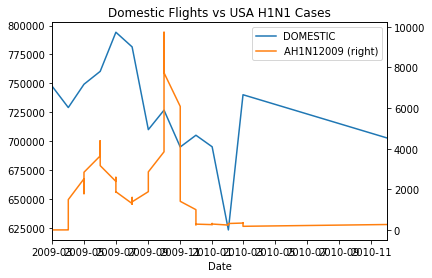

In [12]:
ax = plt.gca()
merged_df.plot.line(x = 'Date', y='DOMESTIC',ax=ax)
merged_df.plot.line(x = 'Date', y='AH1N12009',ax=ax, secondary_y = True)
#merged_df.plot.line(x = 'Date', y='TOTAL',ax=ax)
plt.title("Domestic Flights vs USA H1N1 Cases")
plt.show()

The r-squared is: 0.15803517335995299


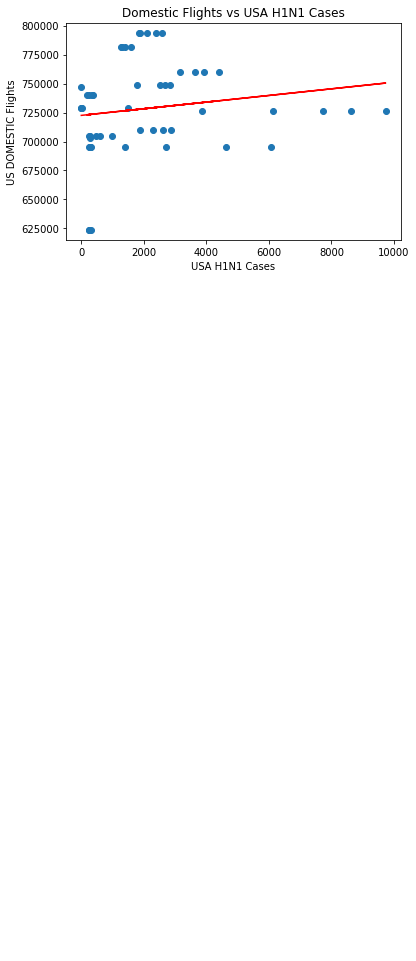

In [14]:
#run scatter plot and calculate r square
x_values = merged_df['AH1N12009']
y_values = merged_df['DOMESTIC']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('USA H1N1 Cases')
plt.ylabel('US DOMESTIC Flights')
plt.title("Domestic Flights vs USA H1N1 Cases")
print(f"The r-squared is: {rvalue}")
plt.show()